# Marketing Campaign Analysis
---

## Overview
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Suppose the cost of this campaign was $6 million and five months of data is provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

## Objectives

1. Provide a quantitative assessment of whether the marketing campaign was successful.

2. Based on the provided data, recommend ways the campaign strategy can also be applied in the future to improve performance.

# Data Preprocessing
---

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the data
calendar_df = pd.read_csv('./datasets/calendar.csv')
client_df = pd.read_csv('./datasets/clients.csv')
deposit_df = pd.read_csv('./datasets/deposits.csv')

In [3]:
# view client data
client_df.head()

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [4]:
# view deposit data
deposit_df.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [5]:
# View calendar data
calendar_df.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [6]:
# Merge the data
df = pd.merge(client_df, deposit_df, on='client_id')
df = pd.merge(df, calendar_df, left_on='deposit_date', right_on="gregorian_date")
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


In [7]:
# Drop greogorian date column
df = df.drop(columns=['gregorian_date'])

# View the data
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2


In [8]:
# Show columns with values that are null
df.isnull().sum()

client_id                     0
client_geographical_region    0
client_residence_status       0
client_age                    0
deposit_type                  0
deposit_amount                0
deposit_cadence               0
deposit_date                  0
month_name                    0
dtype: int64

# Exploratory Data Analysis
---

## Client Activity

In [9]:
# Print unique active clients each month
print(df.groupby('month_name').client_id.count())

# Print a space
print('')

# Print total number of unique clients
print(f'Total number of unique clients: {len(df.client_id.unique())}')

month_name
Month 1     77827
Month 2     80205
Month 3    108505
Month 4    107494
Month 5    106363
Name: client_id, dtype: int64

Total number of unique clients: 46347


<Axes: title={'center': 'Unique Active Clients Each Month'}, xlabel='month_name'>

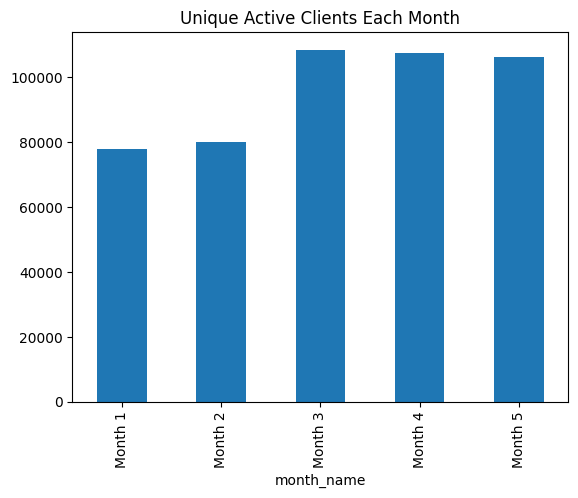

In [10]:
# Graph unique active clients each month
df.groupby('month_name').client_id.count().plot(kind='bar', title='Unique Active Clients Each Month')

## Regional Analysis

In [11]:
# Break down data by region
df.groupby('client_geographical_region').client_id.count()

client_geographical_region
Midwest       88185
Northeast     78576
South        108004
West         205629
Name: client_id, dtype: int64

In [12]:
# Calculate the month over month increase in active clients per region
df.groupby(['client_geographical_region', 'month_name']).client_id.count().unstack().pct_change(axis='columns') * 100

month_name,Month 1,Month 2,Month 3,Month 4,Month 5
client_geographical_region,,,,,
Midwest,NaN,3.398435,34.776679,0.480648,-0.745217
Northeast,NaN,3.151110,38.154748,-1.200514,-1.418560
South,NaN,2.167886,31.361589,-1.850781,-0.761849
West,NaN,3.356436,36.530015,-0.950134,-1.193106


<Axes: title={'center': 'Month Over Month Increase in Active Clients Per Region'}, xlabel='client_geographical_region'>

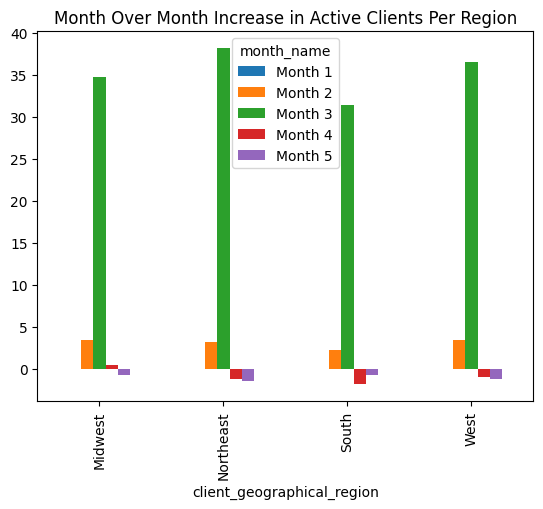

In [13]:
# Store the month over month increase in active clients per region in a variable
month_over_month_increase = df.groupby(['client_geographical_region', 'month_name']).client_id.count().unstack().pct_change(axis='columns') * 100

# Graph the month over month increase in active clients per region
month_over_month_increase.plot(kind='bar', title='Month Over Month Increase in Active Clients Per Region')



In [14]:
# View client residence data
df['client_residence_status'].value_counts()

client_residence_status
Own     345432
Rent    134962
Name: count, dtype: int64

In [15]:
# Calculate the month over month change in client residence status per region
df.groupby(['client_geographical_region', 'client_residence_status', 'month_name']).client_id.count().unstack().pct_change(axis='columns')*100

month_name                                          Month 1   Month 2  \
client_geographical_region client_residence_status                      
Midwest                    Own                          NaN  2.707711   
                           Rent                         NaN  4.899329   
Northeast                  Own                          NaN  3.362723   
                           Rent                         NaN  2.417348   
South                      Own                          NaN  1.301083   
                           Rent                         NaN  3.675577   
West                       Own                          NaN  2.814803   
                           Rent                         NaN  4.995127   

month_name                                            Month 3   Month 4  \
client_geographical_region client_residence_status                        
Midwest                    Own                      37.890938 -0.109043   
                           Rent                     28.150992  1.830587   
Northeast                  Own                      38.147193 -1.493395   
                           Rent                     38.181187 -0.175835   
South                      Own                      35.048703 -3.568009   
                           Rent                     25.095224  1.299918   
West                       Own                      38.543788 -1.749922   
                           Rent                     30.563936  1.564166   

month_name                                           Month 5  
client_geographical_region client_residence_status            
Midwest                    Own                     -0.953351  
                           Rent                    -0.277823  
Northeast                  Own                     -1.355685  
                           Rent                    -1.635632  
South                      Own                     -0.529521  
                           Rent                    -1.167630  
West                       Own                     -1.392645  
                           Rent                    -0.586279

<Axes: title={'center': 'Month Over Month Change in Client Residence Status Per Region'}, xlabel='client_geographical_region,client_residence_status'>

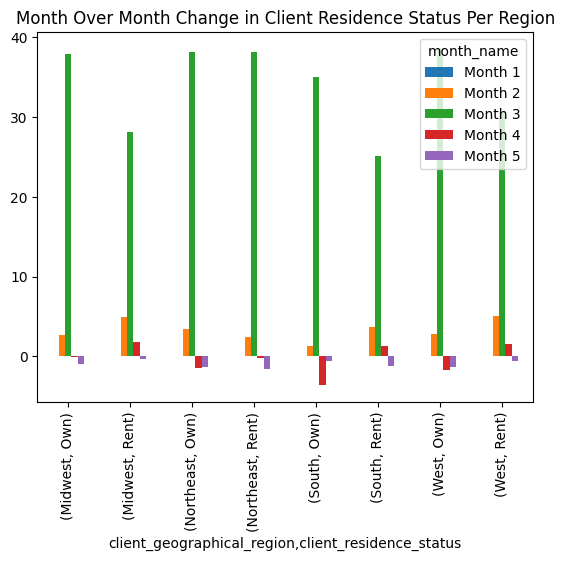

In [16]:
# Store the month over month change in client residence status per region in a variable
month_over_month_residence = df.groupby(['client_geographical_region', 'client_residence_status', 'month_name']).client_id.count().unstack().pct_change(axis='columns')*100

# Graph the month over month change in client residence status per region
month_over_month_residence.plot(kind='bar', title='Month Over Month Change in Client Residence Status Per Region')

## Client Age Analysis

In [17]:
# View client age data
df['client_age'].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

<Axes: >

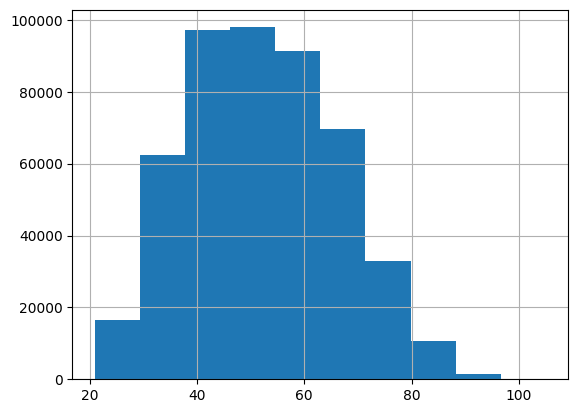

In [18]:
# View client age as histogram
df['client_age'].hist()

# Client Deposit Analysis

In [19]:
# View month over month deposit type by region
df.groupby(['client_geographical_region', 'deposit_type', 'month_name']).deposit_type.count().unstack().pct_change(axis='columns')*100

month_name                                    Month 1   Month 2    Month 3  \
client_geographical_region deposit_type                                      
Midwest                    Actual Deposit         NaN  4.030738  34.076655   
                           Scheduled Deposit      NaN  2.799890  35.447263   
Northeast                  Actual Deposit         NaN  3.733553  38.163945   
                           Scheduled Deposit      NaN  2.605210  38.146034   
South                      Actual Deposit         NaN  2.651077  30.449983   
                           Scheduled Deposit      NaN  1.723771  32.207113   
West                       Actual Deposit         NaN  3.705574  35.877770   
                           Scheduled Deposit      NaN  3.034884  37.134635   

month_name                                     Month 4   Month 5  
client_geographical_region deposit_type                           
Midwest                    Actual Deposit     1.340956 -1.046261  
                           Scheduled Deposit -0.335140 -0.454950  
Northeast                  Actual Deposit    -0.550838 -1.592430  
                           Scheduled Deposit -1.816204 -1.251661  
South                      Actual Deposit    -0.380392 -0.650872  
                           Scheduled Deposit -3.196455 -0.866367  
West                       Actual Deposit     0.058239 -1.249161  
                           Scheduled Deposit -1.876312 -1.140605

<Axes: title={'center': 'Month Over Month Deposit Type by Region'}, xlabel='client_geographical_region,deposit_type'>

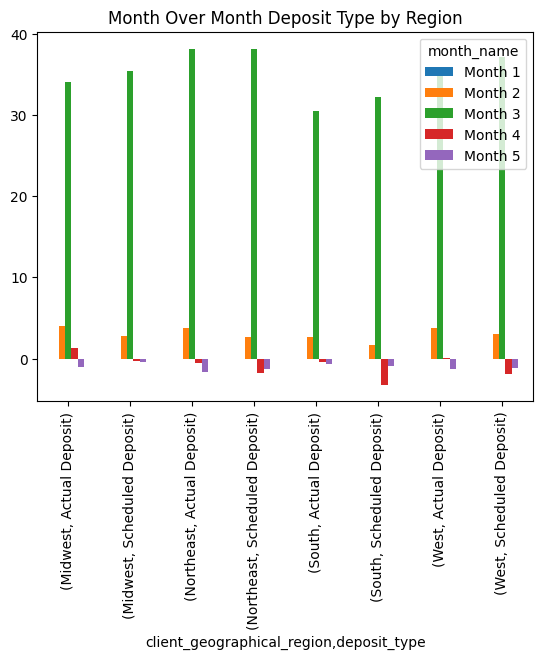

In [20]:
# Store month over month deposit type by region in a variable
month_over_month_deposit = df.groupby(['client_geographical_region', 'deposit_type', 'month_name']).deposit_type.count().unstack().pct_change(axis='columns')*100

# Graph month over month deposit type by region
month_over_month_deposit.plot(kind='bar', title='Month Over Month Deposit Type by Region')

<Axes: xlabel='deposit_type'>

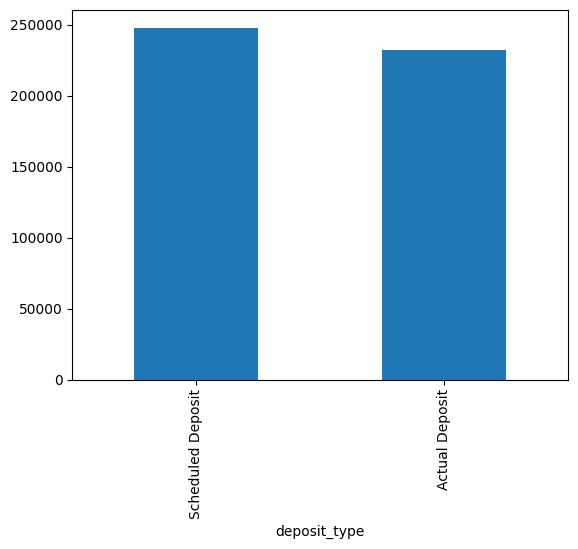

In [21]:
# View the deposit type as a bar chart
df['deposit_type'].value_counts().plot(kind='bar')

In [22]:
# View month over month deposit cadence by region
df.groupby(['client_geographical_region', 'deposit_cadence', 'month_name']).deposit_cadence.count().unstack().pct_change(axis='columns')*100

month_name                                  Month 1    Month 2    Month 3  \
client_geographical_region deposit_cadence                                  
Midwest                    Biweekly             NaN   3.225327  33.966883   
                           Extra                NaN  32.142857  51.351351   
                           Monthly              NaN   2.782752  34.955100   
Northeast                  Biweekly             NaN   3.127102  37.691555   
                           Extra                NaN  24.342105  92.592593   
                           Monthly              NaN   2.675120  37.033133   
South                      Biweekly             NaN   3.023699  28.291909   
                           Extra                NaN  17.803030  68.488746   
                           Monthly              NaN   1.169703  32.467779   
West                       Biweekly             NaN   3.948517  34.641483   
                           Extra                NaN   6.846473  85.436893   
                           Monthly              NaN   2.834051  36.623578   

month_name                                    Month 4   Month 5  
client_geographical_region deposit_cadence                       
Midwest                    Biweekly          2.214101 -0.315457  
                           Extra           -16.326531 -5.182927  
                           Monthly          -0.466779 -1.007783  
Northeast                  Biweekly         -0.153919 -1.399265  
                           Extra           -17.582418 -1.666667  
                           Monthly          -1.516650 -1.428412  
South                      Biweekly         -0.144270 -0.526316  
                           Extra           -12.213740 -6.086957  
                           Monthly          -2.647017 -0.749559  
West                       Biweekly          1.007949 -0.869297  
                           Extra           -15.183246 -0.246914  
                           Monthly          -1.862014 -1.465427

<Axes: title={'center': 'Month Over Month Deposit Cadence by Region'}, xlabel='client_geographical_region,deposit_cadence'>

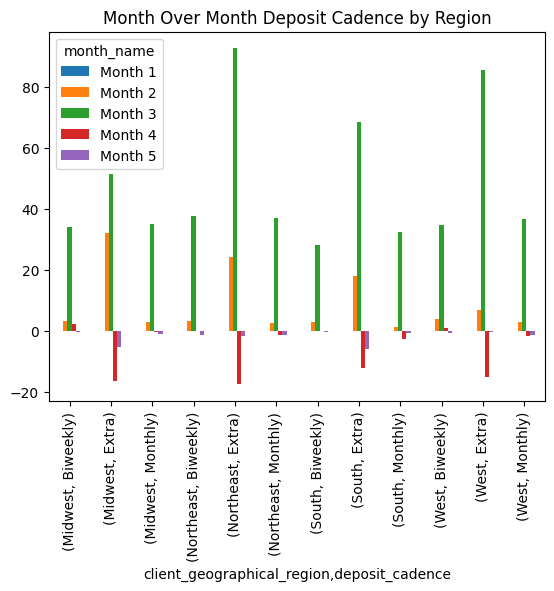

In [23]:
# Store month over month deposit cadence by region in a variable
month_over_month_cadence = df.groupby(['client_geographical_region', 'deposit_cadence', 'month_name']).deposit_cadence.count().unstack().pct_change(axis='columns')*100

# Graph month over month deposit cadence by region
month_over_month_cadence.plot(kind='bar', title='Month Over Month Deposit Cadence by Region')

<Axes: title={'center': 'Deposit Cadence Each Month'}, xlabel='month_name'>

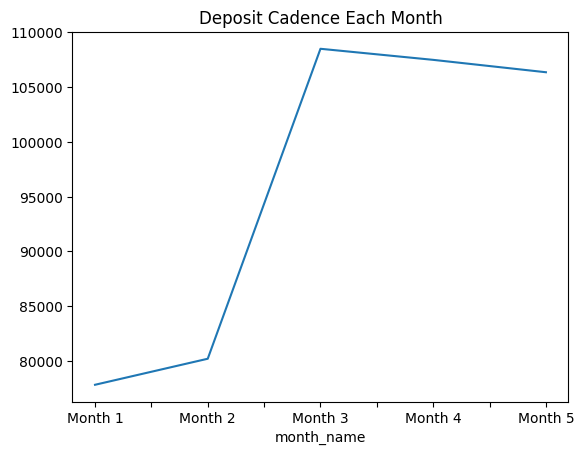

In [24]:
# Graph the deposit cadence each month
df.groupby('month_name').deposit_cadence.count().plot(kind='line', title='Deposit Cadence Each Month')

<Axes: title={'center': 'Number of Unique Clients by Month'}, xlabel='month_name'>

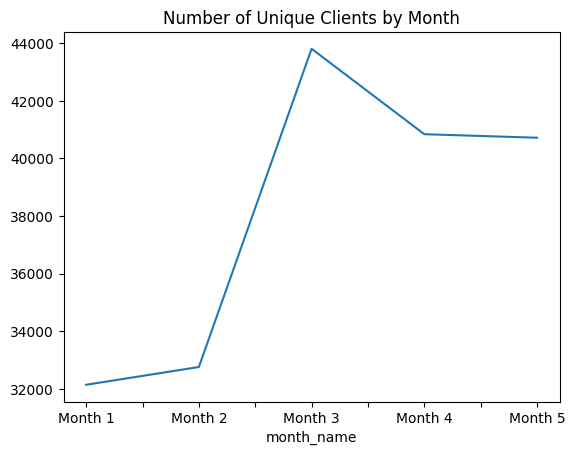

In [25]:
# Plot the number of unique clients by month
df.groupby('month_name').client_id.nunique().plot(kind='line', title='Number of Unique Clients by Month')

<Axes: title={'center': 'Number of Clients by Month'}, xlabel='month_name'>

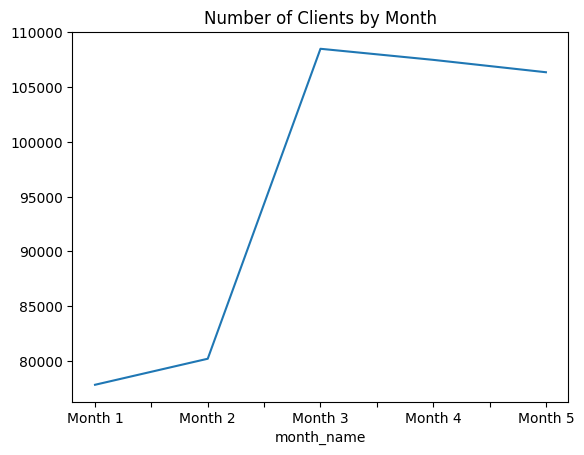

In [26]:
# Plot the number of clients by month
df.groupby('month_name').client_id.count().plot(kind='line', title='Number of Clients by Month')

<Axes: title={'center': 'Sum of Deposits by Month'}, xlabel='month_name'>

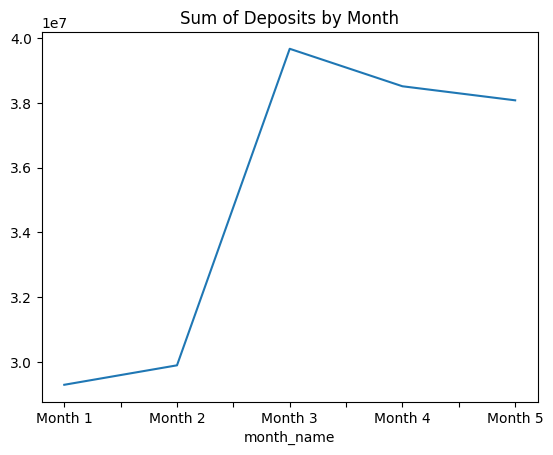

In [27]:
# Plot the sum of deposits that occurred each month
df.groupby('month_name').deposit_amount.sum().plot(kind='line', title='Sum of Deposits by Month')

In [28]:
# View the change in deposits from month to month
df.groupby('month_name').deposit_amount.sum().diff()

month_name
Month 1           NaN
Month 2     601600.41
Month 3    9788625.83
Month 4   -1159237.37
Month 5    -434644.50
Name: deposit_amount, dtype: float64

<Axes: title={'center': 'Average Deposit Amount by Month'}, xlabel='month_name'>

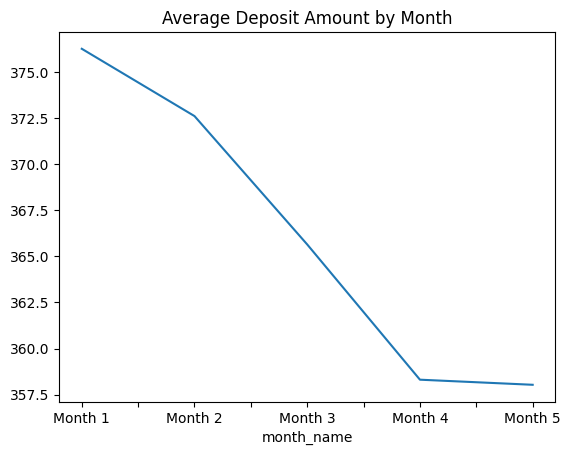

In [29]:
# Plot average deposit amount by month
df.groupby('month_name').deposit_amount.mean().plot(kind='line', title='Average Deposit Amount by Month')

In [30]:
# Show summary statistics for deposit amount
df['deposit_amount'].describe()


count    480394.000000
mean        365.207130
std         346.644434
min           0.010000
25%         200.000000
50%         290.000000
75%         452.000000
max       30000.000000
Name: deposit_amount, dtype: float64

<Axes: ylabel='Frequency'>

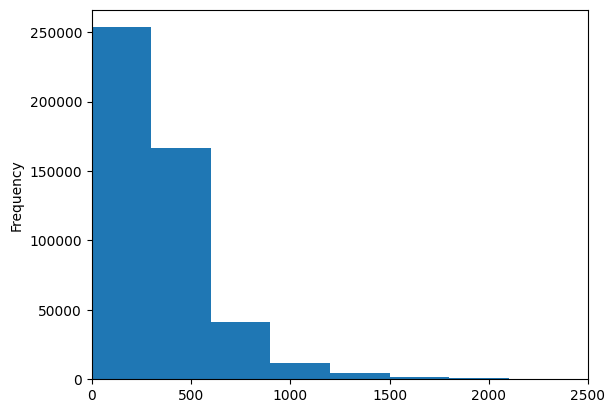

In [31]:
# View the distribution of deposit amount
# Adjust the x-axis to see the distribution
df['deposit_amount'].plot.hist(bins=100, xlim=(0, 2500))

## Question 1 
### Determine if the Marketing Campaign was a Success

To determine the success of the marketing campaign the following metric were evaluated:
- Number of Unique Clients Per Month
- Total Deposits Per Month
- Deposit Cadence Per Month
- Deposit Type Per Month

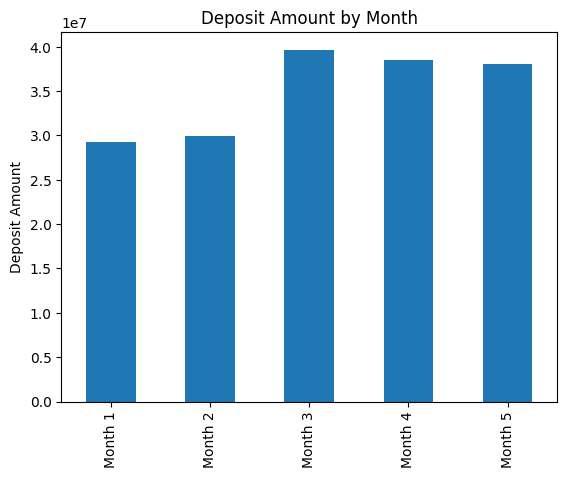

In [32]:
# Plot the deposit amount by month as a line graph
df.groupby('month_name').deposit_amount.sum().plot(kind='bar', title='Deposit Amount by Month')

plt.ylabel('Deposit Amount')
plt.xlabel('')

# Export the graph as a png
plt.savefig('./datasets/images/deposit_amount_by_month.png', bbox_inches="tight")

# Show the graph
plt.show()



In [33]:
# Print the sum of deposits each month
print(df.groupby('month_name').deposit_amount.sum())

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


On average, Freedom debt relief charges a fee if 21.5% of the total amount of debt that they settle for their clients.

In [34]:
# Print the profit each month (deposit_amount * 0.215)
profit_per_month = df.groupby('month_name').deposit_amount.sum() * 0.215

# Print the profit each month
print(profit_per_month)

month_name
Month 1    6.296239e+06
Month 2    6.425583e+06
Month 3    8.530137e+06
Month 4    8.280901e+06
Month 5    8.187453e+06
Name: deposit_amount, dtype: float64


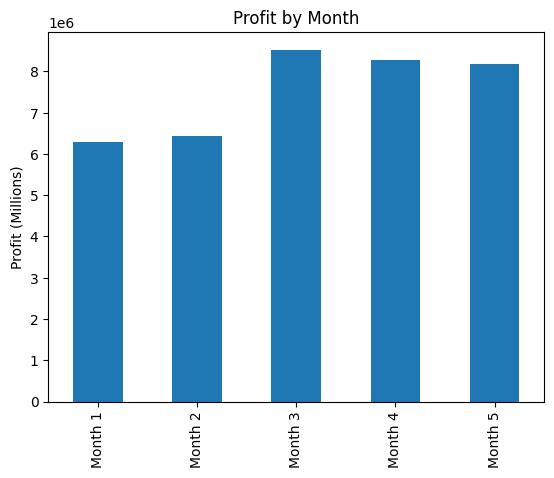

In [36]:
# Plot the profit each month
profit_per_month.plot(kind='bar', 
                      title='Profit by Month',
                      ylabel='Profit (Millions)',
                      xlabel='')
        
# Export the graph as a png
plt.savefig('./datasets/images/profit_by_month.png', bbox_inches="tight")

# Show the graph
plt.show()


In [38]:
# Find the difference in profit between month 3 and month 2
month_3_profit_increase = profit_per_month["Month 3"] - profit_per_month["Month 2"]

# Find the difference in profit between month 4 and month 2
month_4_profit_increase = profit_per_month["Month 4"] - profit_per_month["Month 2"]

# Find the difference in profit between month 5 and month 2
month_5_profit_increase = profit_per_month["Month 5"] - profit_per_month["Month 2"]

# Print the profit increase from before, during, and after marketing campaign
print(f'Profit increase between month 3 and month 2: {month_3_profit_increase:,.2f}')
print(f'Profit increase between month 4 and month 2: {month_4_profit_increase:,.2f}')
print(f'Profit increase between month 5 and month 2: {month_5_profit_increase:,.2f}')

# Determine average profit increase for months 3, 4, and 5
average_profit_increase = (month_3_profit_increase + month_4_profit_increase + month_5_profit_increase) / 3

# Print the average profit increase
print(f'Average profit increase: {average_profit_increase:,.2f} per month')

# Determine total profit for months 3, 4, and 5
total_profit_increase = month_3_profit_increase + month_4_profit_increase + month_5_profit_increase

# Print the total profit increase
print(f'Total profit increase: {total_profit_increase:,.2f} over 3 months')


Profit increase between month 3 and month 2: 2,104,554.55
Profit increase between month 4 and month 2: 1,855,318.52
Profit increase between month 5 and month 2: 1,761,869.95
Average profit increase: 1,907,247.67 per month
Total profit increase: 5,721,743.02 over 3 months


- We can see that, on average, the marketing campaign boosted profits by rougly $1.9 million per month. 

- Over month's 3, 4, and 5 the total profit was rougly $5.7 million. Given that the cost of the marketing campaign was $5 million we can see a $700,000 increase.

- To further understand the cost/benefits of the marketing campaign, lets take a look at total profits over a 12 month period with or without the campaign. 

- We will calculate the average profit pre and post campaign and use these values to determine how much we expect total profit to increase each month.

In [39]:
# Average profit for months 1 and 2
avg_profit_before = (profit_per_month["Month 1"] + profit_per_month["Month 2"]) / 2

# Average profit for months 3, 4, and 5
avg_profit_after = (profit_per_month["Month 3"] + profit_per_month["Month 4"] + profit_per_month["Month 5"]) / 3


# Print the average profit before and after the marketing campaign
print(f'Average profit before the marketing campaign: {avg_profit_before:,.2f}')
print(f'Average profit after the marketing campaign: {avg_profit_after:,.2f}')

Average profit before the marketing campaign: 6,360,910.68
Average profit after the marketing campaign: 8,332,830.40


In [40]:
# Create a dataframe with 12 rows and 2 columns
hypothetical_df = pd.DataFrame(np.zeros((12, 2)), columns=['no_campaign', 'campaign'])

# Set the starting value for no_campaign to 0
hypothetical_df['no_campaign'][0] = 0

# Set the starting value for campaign to -5,000,000
hypothetical_df['campaign'][0] = -5000000

# Set the value for month 1 for no campaign to 6,300,000 and campaign to the value of month 0 + 8,200,000
hypothetical_df['no_campaign'][1] = 6300000
hypothetical_df['campaign'][1] = hypothetical_df['campaign'][0] + 8200000

# Create a for loop to calculate the value for each month based on the previous month

for i in range(2, 12):
    hypothetical_df['no_campaign'][i] = hypothetical_df['no_campaign'][i-1] + 6300000
    hypothetical_df['campaign'][i] = hypothetical_df['campaign'][i-1] + 8200000

# Create a column for the difference in profit between the two scenarios
hypothetical_df['difference'] = hypothetical_df['campaign'] - hypothetical_df['no_campaign']

# Add 1 to each value in the index
hypothetical_df.index = hypothetical_df.index + 1

# Change the index name to month
hypothetical_df.index.name = 'month'

# Change values of month to Month 1, Month 2, etc.
hypothetical_df.index = hypothetical_df.index.map(lambda x: f'Month {x}')

# View hypothetical_df
hypothetical_df

,no_campaign,campaign,difference
month,,,
Month 1,0.0,-5000000.0,-5000000.0
Month 2,6300000.0,3200000.0,-3100000.0
Month 3,12600000.0,11400000.0,-1200000.0
Month 4,18900000.0,19600000.0,700000.0
Month 5,25200000.0,27800000.0,2600000.0
Month 6,31500000.0,36000000.0,4500000.0
Month 7,37800000.0,44200000.0,6400000.0
Month 8,44100000.0,52400000.0,8300000.0
Month 9,50400000.0,60600000.0,10200000.0


We can see that by the 4th month the campaign is netting greater profit. In addition, the yearly difference would be $15,900,000 if our assumptions on profit per month are accurate.

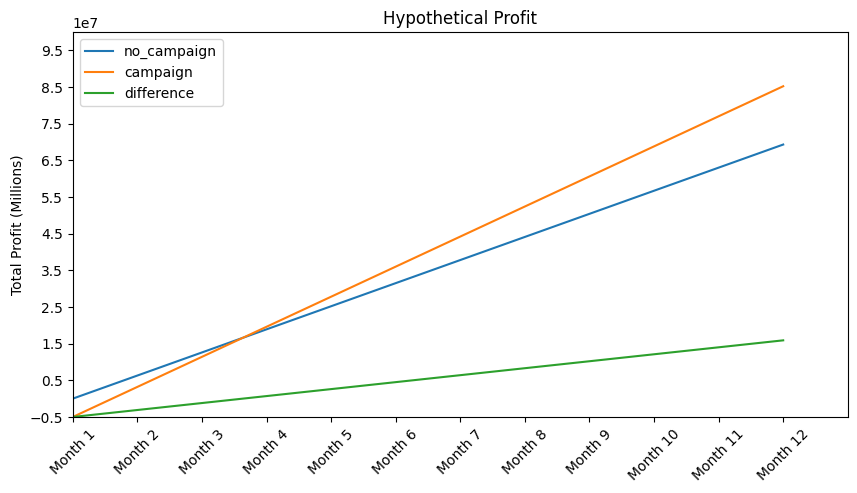

In [42]:
# Plot the hypothetical_df
hypothetical_df.plot(
    kind='line',
    figsize=(10, 5), 
    title='Hypothetical Profit',
    ylabel='Total Profit (Millions)',
    xlabel='',
    ylim=(-5000000, 100000000),
    yticks=np.arange(-5000000, 100000000, 10000000),
    xlim=(0, 12),
    xticks=np.arange(0, 12, 1),
    rot=45,
    )

# Export the graph as a png
plt.savefig('./datasets/images/hypothetical_profit.png', bbox_inches="tight")

plt.show()

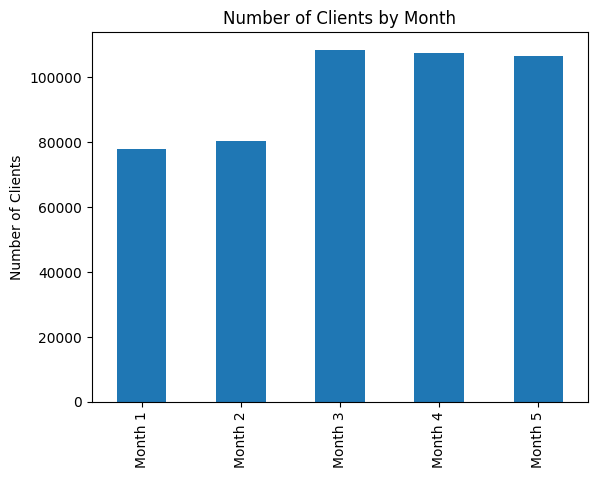

In [43]:
# Create a line graph of the number of clients each month
df.groupby('month_name').client_id.count().plot(kind='bar', title='Number of Clients by Month')

plt.ylabel('Number of Clients')
plt.xlabel('')

# Export the graph as a png
plt.savefig('./datasets/images/number_of_clients_by_month.png', bbox_inches="tight")

# Show the graph
plt.show()

In [44]:
# Create a variable that stores unique clients from months 1 and 2
month_1_2 = df[df['month_name'].isin(['Month 1', 'Month 2'])].client_id.unique()

# Create a variable that stores unique clients from month 3
month_3 = df[df['month_name'].isin(['Month 3'])].client_id.unique()


# Print values
print(f'Unique clients prior to the start of the marketing campaign {len(month_1_2)}')
print(f'Unique clients immediately after the marketing campaign: {len(month_3)}')

# Print difference in unique clients over the course of the marketing campaign
print(f'There was an increase of {len(month_3) - len(month_1_2)} clients over the course of the marketing campaign.')

Unique clients prior to the start of the marketing campaign 34051
Unique clients immediately after the marketing campaign: 43806
There was an increase of 9755 clients over the course of the marketing campaign.


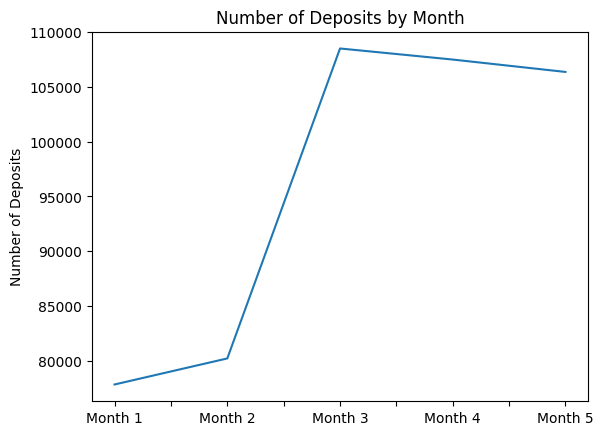

In [45]:
# Create a line graph of the number of deposits each month
df.groupby('month_name').deposit_amount.count().plot(kind='line', title='Number of Deposits by Month')

plt.ylabel('Number of Deposits')
plt.xlabel('')

plt.show()

In [46]:
# Create a variable that stores unique deposits from months 1 and 2
month_1_2 = df[df['month_name'].isin(['Month 1', 'Month 2'])].deposit_amount.unique()

# Create a variable that stores unique deposits from month 3
month_3 = df[df['month_name'].isin(['Month 3'])].deposit_amount.unique()

# Print values
print(f'Unique deposits prior to the start of the marketing campaign {len(month_1_2)}')
print(f'Unique deposits immediately after the marketing campaign: {len(month_3)}')

# Print difference in unique deposits over the course of the marketing campaign
print(f'There was an increase of {len(month_3) - len(month_1_2)} deposits over the course of the marketing campaign.')

Unique deposits prior to the start of the marketing campaign 1757
Unique deposits immediately after the marketing campaign: 2090
There was an increase of 333 deposits over the course of the marketing campaign.


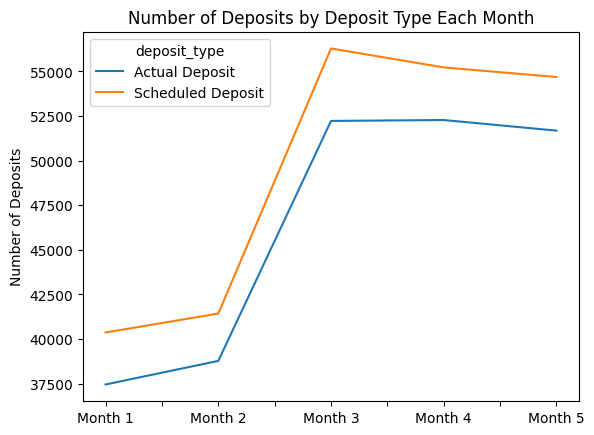

In [47]:
# Create a line graph that visualizes the number of deposits by deposit type each month
df.groupby(['month_name', 'deposit_type']).deposit_type.count().unstack().plot(kind='line', title='Number of Deposits by Deposit Type Each Month')

plt.ylabel('Number of Deposits')
plt.xlabel('')

plt.show()

## Question 2
### How can the marketing campaign be improved?

Overall, the marketing campaign was very successful and showed significant increases across the areas measured. 

One way to improve the marketing campaign would be to identify individuals who typically pay more and/or were likely to join the service as a result of the campaign

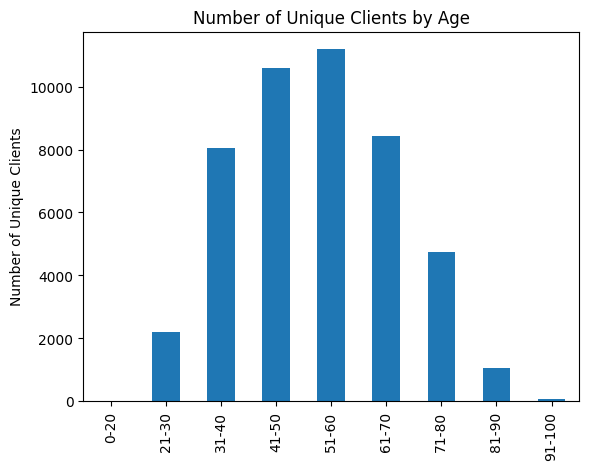

In [48]:
# Bin clients by age
df['client_age'] = pd.cut(df['client_age'], 
                          bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                          labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Create a graph that visualizes how unique clients are stratified by age
df.groupby('client_age').client_id.nunique().plot(kind='bar', title='Number of Unique Clients by Age')

plt.ylabel('Number of Unique Clients')
plt.xlabel('')
plt.show()


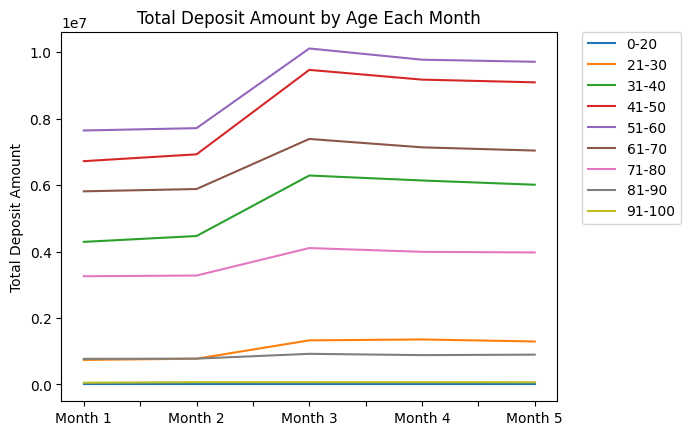

In [49]:
# Create a graph that visualizes how total deposit amount are stratified by age over each month
df.groupby(['month_name', 'client_age']).deposit_amount.sum().unstack().plot(kind='line', title='Total Deposit Amount by Age Each Month')

# Move legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Add labels
plt.ylabel('Total Deposit Amount')
plt.xlabel('')

# Show plot
plt.show()


In [50]:
# Create a dataframe that shows the change in total deposit amount by age each month
age_df = df.groupby(['month_name', 'client_age']).deposit_amount.sum().unstack().diff()

age_df

client_age,0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
month_name,,,,,,,,,
Month 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month 2,0.0,36475.26,175969.91,205030.04,70677.07,68975.76,21457.43,7141.00,16073.94
Month 3,0.0,552091.97,1820536.90,2540971.29,2396941.88,1506835.65,826569.69,144394.39,-753.94
Month 4,0.0,27044.61,-149727.45,-292603.04,-337438.61,-252323.69,-113422.51,-39031.68,-259.00
Month 5,0.0,-60984.83,-127508.48,-81693.69,-62890.53,-96875.20,-18353.12,14330.35,-1107.00


In [51]:
# Create a dataframe that shows the percent change in total deposit amount by age each month
age_df_pct = df.groupby(['month_name', 'client_age']).deposit_amount.sum().unstack().pct_change() * 100

age_df_pct

client_age,0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
month_name,,,,,,,,,
Month 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month 2,NaN,4.936282,4.101104,3.051522,0.924891,1.186887,0.658963,0.926657,30.214173
Month 3,NaN,71.201200,40.757401,36.698167,31.079314,25.624444,25.217979,18.565405,-1.088346
Month 4,NaN,2.037276,-2.381426,-3.091440,-3.337909,-3.415643,-2.763525,-4.232660,-0.377992
Month 5,NaN,-4.502275,-2.077506,-0.890653,-0.643589,-1.357751,-0.459880,1.622690,-1.621717


In [52]:
# Create a dataframe that shows the number of unique clients by age each month
client_age_df = df.groupby(['month_name', 'client_age']).client_id.nunique().unstack()

# View client_age_df
client_age_df

client_age,0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
month_name,,,,,,,,,
Month 1,0,1145,5258,7269,7923,6125,3507,847,63
Month 2,0,1214,5427,7394,8058,6219,3525,850,67
Month 3,0,2061,7576,9987,10629,7973,4481,1014,82
Month 4,0,1934,7060,9322,9899,7434,4170,945,73
Month 5,0,1897,7039,9297,9881,7406,4177,945,73


In [53]:
# Calculate percent change in unique clients by age each month as a dataframe
percent_change = df.groupby(['month_name', 'client_age']).client_id.nunique().unstack().pct_change() *100

percent_change

client_age,0-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
month_name,,,,,,,,,
Month 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month 2,NaN,6.026201,3.214150,1.719631,1.703900,1.534694,0.513259,0.354191,6.349206
Month 3,NaN,69.769357,39.598305,35.068975,31.906180,28.203891,27.120567,19.294118,22.388060
Month 4,NaN,-6.162057,-6.810982,-6.658656,-6.868003,-6.760316,-6.940415,-6.804734,-10.975610
Month 5,NaN,-1.913133,-0.297450,-0.268183,-0.181837,-0.376648,0.167866,0.000000,0.000000


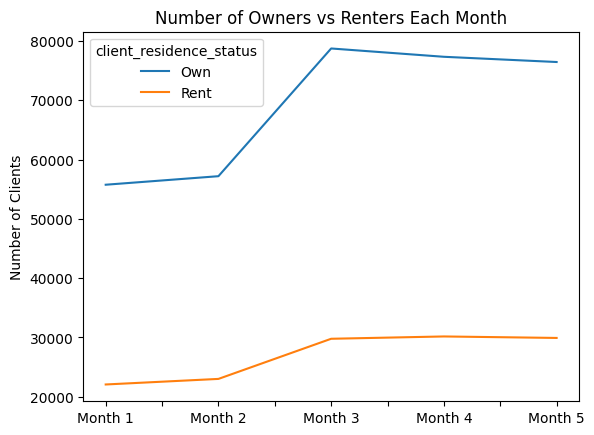

In [54]:
# Plot the client residence status each month
df.groupby(['month_name', 'client_residence_status']).client_id.count().unstack().plot(
    kind='line', 
    title='Number of Owners vs Renters Each Month',
    ylabel='Number of Clients',
    xlabel='',
    )

plt.show()

In [55]:
# Calculate the percent change in client residence status each month
client_residence_status_df = df.groupby(['month_name', 'client_residence_status']).client_id.count().unstack().pct_change() * 100

# View client_residence_status_df
client_residence_status_df

client_residence_status,Own,Rent
month_name,,
Month 1,NaN,NaN
Month 2,2.581073,4.253681
Month 3,37.651029,29.403841
Month 4,-1.779635,1.309560
Month 5,-1.139376,-0.828610


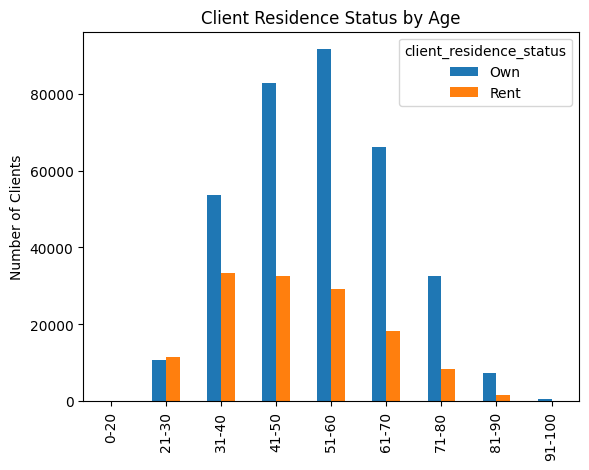

In [56]:
# Plot client residence status based on age
df.groupby(['client_age', 'client_residence_status']).client_id.count().unstack().plot(
    kind='bar',
    title='Client Residence Status by Age',
    ylabel='Number of Clients',
    xlabel='',
    )

plt.show()

In [57]:
# View the number of owners between the ages of 21-30 at month 2
young_owners_before = df[(df['client_age'] == '21-30') & (df['client_residence_status'] == 'Own') & (df['month_name'] == 'Month 2')].client_id.count()

# Print the number of owners between the ages of 21-30 at month 2
print(f'There were {young_owners_before} owners between the ages of 21-30 at month 2.')

# View the number of owners between the ages of 21-30 at month 3
young_owners_after = df[(df['client_age'] == '21-30') & (df['client_residence_status'] == 'Own') & (df['month_name'] == 'Month 3')].client_id.count()

# Print the number of owners between the ages of 21-30 at month 3
print(f'There were {young_owners_after} owners between the ages of 21-30 at month 3.')

There were 1359 owners between the ages of 21-30 at month 2.
There were 2714 owners between the ages of 21-30 at month 3.


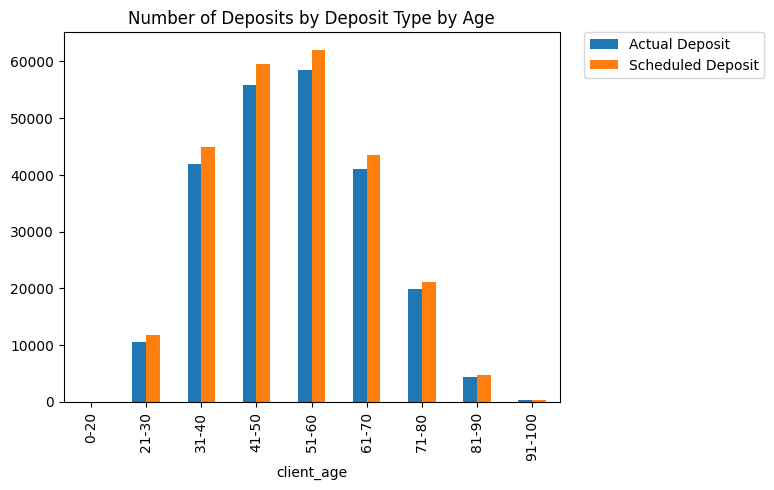

In [58]:
# Create graph of deposit types by age
df.groupby(['client_age', 'deposit_type']).deposit_type.count().unstack().plot(
    kind='bar', 
    title='Number of Deposits by Deposit Type by Age')

# Move legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# SHow plot
plt.show()


In [59]:
# Create a variable that stores the total number of clients between the ages of 41 and 60 before teh marketing campaign
clients_before = df[(df['client_age'] >= '41-50') & (df['client_age'] <= '51-60') & (df['month_name'] == 'Month 2')].client_id.nunique()

# Create a variable that stores the total number of clients between the ages of 41 and 60 after the marketing campaign
clients_after = df[(df['client_age'] >= '41-50') & (df['client_age'] <= '51-60') & (df['month_name'] == 'Month 3')].client_id.nunique()

# Calculate the increase in clients between the ages of 41 and 60
clients_increase = clients_after - clients_before

# Calculate the total increase in clients after the marketing campaign
clients_total_increase = df[(df['month_name'] == 'Month 3')].client_id.nunique() - df[(df['month_name'] == 'Month 2')].client_id.nunique()

# Print the increase in clients between the ages of 41 and 60
print(f'The increase in clients between the ages of 41 and 60: {clients_increase}')

# Print the total increase in clients
print(f'The total increase in clients: {clients_total_increase}')

# Print the percentage of clients between the ages of 41 and 60
print(f'The percentage of clients between the ages of 41 and 60: {round(clients_increase / clients_total_increase * 100, 2)}%')

The increase in clients between the ages of 41 and 60: 5164
The total increase in clients: 11049
The percentage of clients between the ages of 41 and 60: 46.74%


In [60]:
# Create a variable that stores the total number of clients between the ages of 21 and 30 before the marketing campaign
clients_before = df[(df['client_age'] >= '21-30') & (df['client_age'] < '31-40') & (df['month_name'] == 'Month 2')].client_id.nunique()

# Create a variable that stores the total number of clients between the ages of 21 and 30 after the marketing campaign
clients_after = df[(df['client_age'] >= '21-30') & (df['client_age'] < '31-40') & (df['month_name'] == 'Month 3')].client_id.nunique()

# Calculate the increase in clients between the ages of 21 and 30
clients_increase = clients_after - clients_before

# Calculate the total increase in clients after the marketing campaign
clients_total_increase = df[(df['month_name'] == 'Month 3')].client_id.nunique() - df[(df['month_name'] == 'Month 2')].client_id.nunique()

# Print the increase in clients between the ages of 21 and 30
print(f'The increase in clients between the ages of 21 and 30: {clients_increase}')

# Print the total increase in clients
print(f'The total increase in clients: {clients_total_increase}')

# Print the percentage of clients between the ages of 21 and 30
print(f'The percentage of clients between the ages of 21 and 30: {round(clients_increase / clients_total_increase * 100, 2)}%')


The increase in clients between the ages of 21 and 30: 847
The total increase in clients: 11049
The percentage of clients between the ages of 21 and 30: 7.67%


In [61]:
# Calculate the average deposit amount by age and by deposit type
df.groupby(['client_age', 'deposit_type']).deposit_amount.mean().unstack()

deposit_type,Actual Deposit,Scheduled Deposit
client_age,,
0-20,NaN,NaN
21-30,250.046130,242.563669
31-40,315.965341,310.204116
41-50,365.061566,352.915622
51-60,377.105370,368.278941
61-70,400.540748,386.319253
71-80,458.414268,450.887682
81-90,466.379423,469.820519
91-100,504.666478,474.071429


In [62]:
# Calculate the median deposit amount by age and by deposit type
df.groupby(['client_age', 'deposit_type']).deposit_amount.median().unstack()

deposit_type,Actual Deposit,Scheduled Deposit
client_age,,
0-20,NaN,NaN
21-30,200.0,200.0
31-40,248.0,250.0
41-50,282.0,284.0
51-60,294.0,296.0
61-70,312.0,314.0
71-80,386.0,390.0
81-90,394.0,397.0
91-100,407.0,407.0


In [63]:
# Calculate the average deposit amount by age and by deposit cadence
df.groupby(['client_age', 'deposit_cadence']).deposit_amount.mean().unstack()

deposit_cadence,Biweekly,Extra,Monthly
client_age,,,
0-20,NaN,NaN,NaN
21-30,163.460743,382.058385,338.690448
31-40,213.145112,526.570995,420.034310
41-50,241.946994,780.741702,471.509504
51-60,248.293374,724.917044,480.037514
61-70,248.961719,885.670087,461.223083
71-80,246.312206,775.123328,471.051333
81-90,303.862745,544.921188,476.126951
91-100,NaN,1912.882222,469.185129


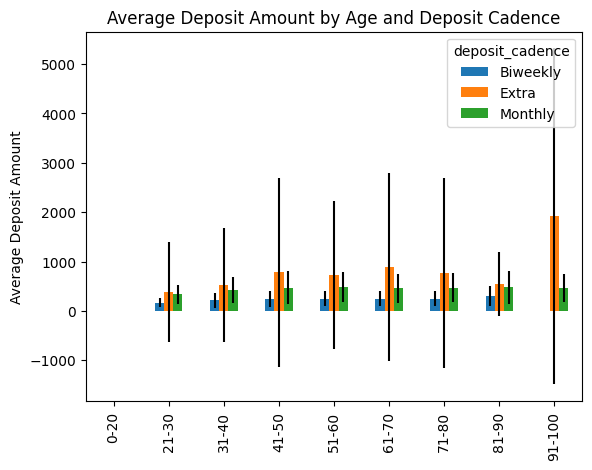

In [64]:
# Plot the average deposit amount by age and by deposit cadence with error bars
df.groupby(['client_age', 'deposit_cadence']).deposit_amount.mean().unstack().plot(
    kind='bar',
    title='Average Deposit Amount by Age and Deposit Cadence',
    ylabel='Average Deposit Amount',
    xlabel='',
    yerr=df.groupby(['client_age', 'deposit_cadence']).deposit_amount.std().unstack(),
    )

plt.show()


In [65]:
# Calculate the median deposit amount by age and by deposit cadence
df.groupby(['client_age', 'deposit_cadence']).deposit_amount.median().unstack()

deposit_cadence,Biweekly,Extra,Monthly
client_age,,,
0-20,NaN,NaN,NaN
21-30,141.0,191.0,288.0
31-40,179.0,240.0,354.0
41-50,202.0,260.0,400.0
51-60,210.5,284.0,408.0
61-70,210.0,286.0,388.0
71-80,205.0,300.0,404.0
81-90,255.0,335.0,400.0
91-100,NaN,300.0,407.0
